In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit as curve_fit
from scipy.optimize import minimize as minimize
from uncertainties import ufloat
from uncertainties import unumpy
from uncertainties.umath import *
from uncertainties.unumpy import nominal_values as nv
from uncertainties.unumpy import std_devs as sd
from lmfit import Model
from lmfit.models import GaussianModel
from functools import partial
from copy import deepcopy
%matplotlib notebook

In [8]:
ds = [0.0,0.3,0.5,1.0]
files = [f"6_angle_{i:.1f}mm.csv" for i in ds]

In [9]:
def read_file(name):
    data = pd.read_csv(name)
    N = unumpy.uarray(data.N,np.sqrt(data.N))
    t = unumpy.uarray(data.t,np.ones(data.t.shape[0]))
    theta = unumpy.uarray(data.angle,np.ones(data.angle.shape[0]))
    I = N/t
    a = lambda : None
    a.I = I
    a.theta = theta
    return a

In [10]:
data = [read_file(i) for i in files]

I expect that plot 0 should be a gaussian, .3 also. 1.0mm should be the cos^2

<IPython.core.display.Javascript object>


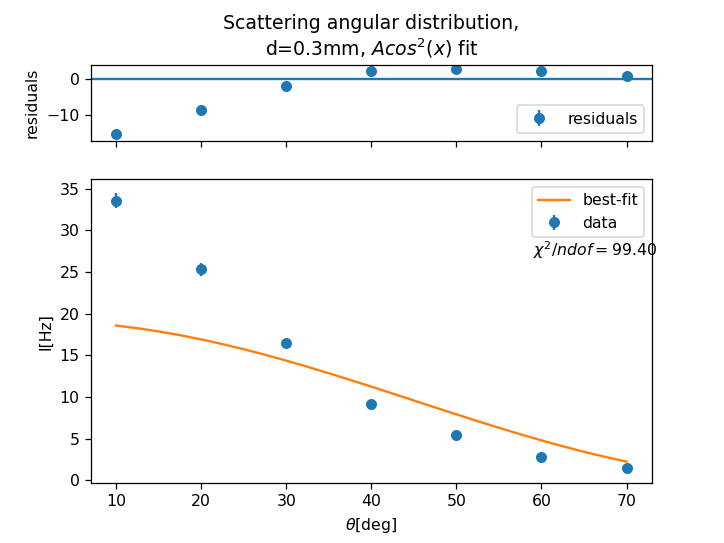

[[Model]]
    Model(dcos)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 4
    # data points      = 7
    # variables        = 1
    chi-square         = 596.373195
    reduced chi-square = 99.3955326
    Akaike info crit   = 33.1146954
    Bayesian info crit = 33.0606056
[[Variables]]
    A:  19.1432024 +/- 3.17931865 (16.61%) (init = 1)


<IPython.core.display.Javascript object>


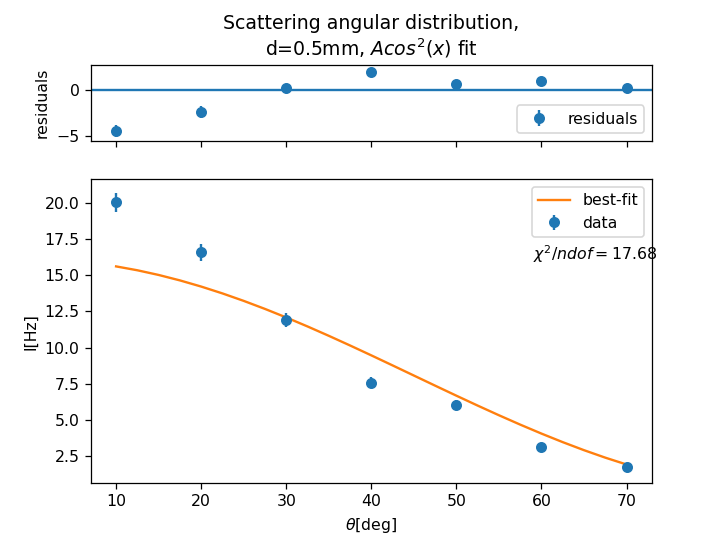

[[Model]]
    Model(dcos)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 5
    # data points      = 7
    # variables        = 1
    chi-square         = 106.053530
    reduced chi-square = 17.6755884
    Akaike info crit   = 21.0262367
    Bayesian info crit = 20.9721469
[[Variables]]
    A:  16.1122787 +/- 1.20078137 (7.45%) (init = 1)


<IPython.core.display.Javascript object>


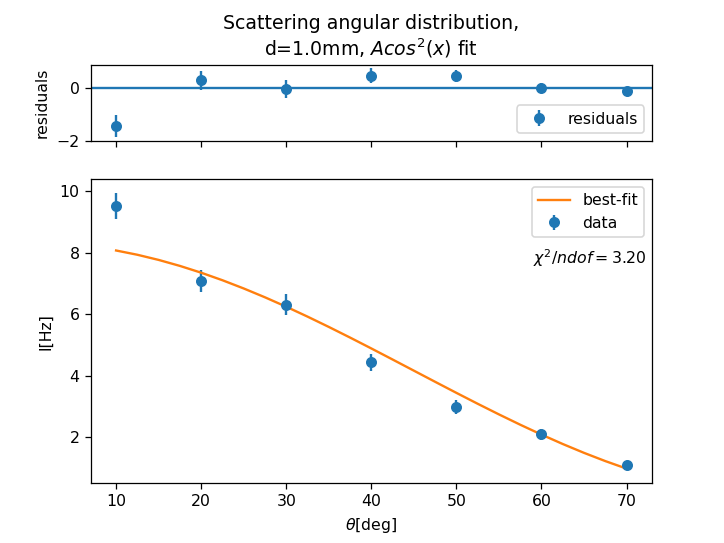

[[Model]]
    Model(dcos)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 5
    # data points      = 7
    # variables        = 1
    chi-square         = 19.1838752
    reduced chi-square = 3.19731253
    Akaike info crit   = 9.05711960
    Bayesian info crit = 9.00302975
[[Variables]]
    A:  8.31828143 +/- 0.35078450 (4.22%) (init = 1)


In [5]:
def dcos(x,A):
    ret = A*np.cos(np.pi/180*x)**2
    return ret
cm = Model(dcos)
for i in range(1,4):
    fig = plt.figure()
    x = nv(data[i].theta)[1:]
    y = nv(data[i].I)[1:]
    yerr = sd(data[i].I)[1:]
    res = cm.fit(nv(y),x=x,A=1,weights=1/yerr)
    
    res.plot(fig=fig,numpoints=25,xlabel=r'$\theta [\deg]$',ylabel="I[Hz]")
    fig.get_axes()[1].text(59,y[0]*0.8,f"$\chi^2/ndof=${res.redchi:.2f}")
    fig.get_axes()[0].set_title(f"Scattering angular distribution,\nd={ds[i]:.1f}mm, $Acos^2(x)$ fit")
    fig.savefig(f"angle_cos2_{int(ds[i]*10):d}dmm.png")
    print(str.format(res.fit_report()))

<IPython.core.display.Javascript object>


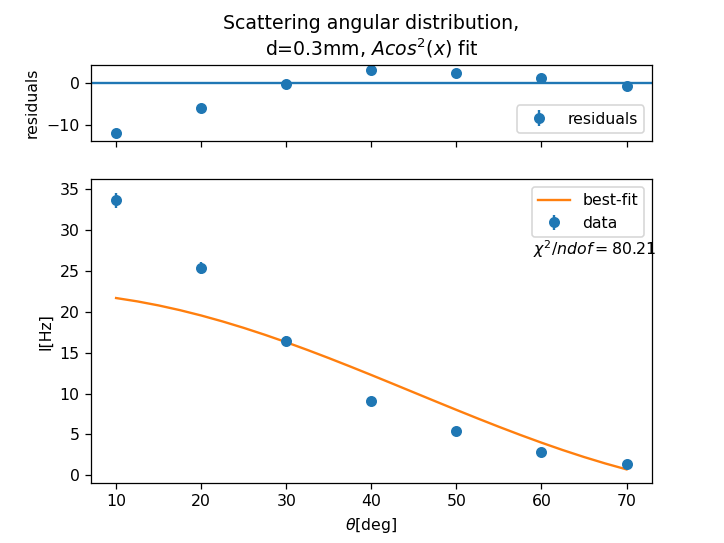

[[Model]]
    Model(dcosc)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 6
    # data points      = 7
    # variables        = 2
    chi-square         = 401.025741
    reduced chi-square = 80.2051483
    Akaike info crit   = 32.3368083
    Bayesian info crit = 32.2286286
[[Variables]]
    A:  24.5198878 +/- 4.47501472 (18.25%) (init = 1)
    c: -2.12822733 +/- 1.36368862 (64.08%) (init = 0.6)
[[Correlations]] (unreported correlations are < 0.100)
    C(A, c) = -0.770


<IPython.core.display.Javascript object>


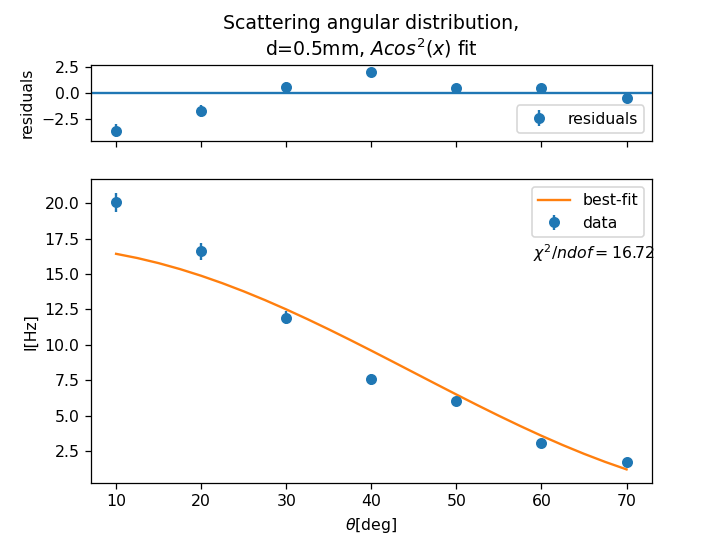

[[Model]]
    Model(dcosc)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 6
    # data points      = 7
    # variables        = 2
    chi-square         = 83.6072801
    reduced chi-square = 16.7214560
    Akaike info crit   = 21.3615431
    Bayesian info crit = 21.2533634
[[Variables]]
    A:  17.8330659 +/- 1.88942751 (10.60%) (init = 1)
    c: -0.86923443 +/- 0.75024305 (86.31%) (init = 0.6)
[[Correlations]] (unreported correlations are < 0.100)
    C(A, c) = -0.786


<IPython.core.display.Javascript object>


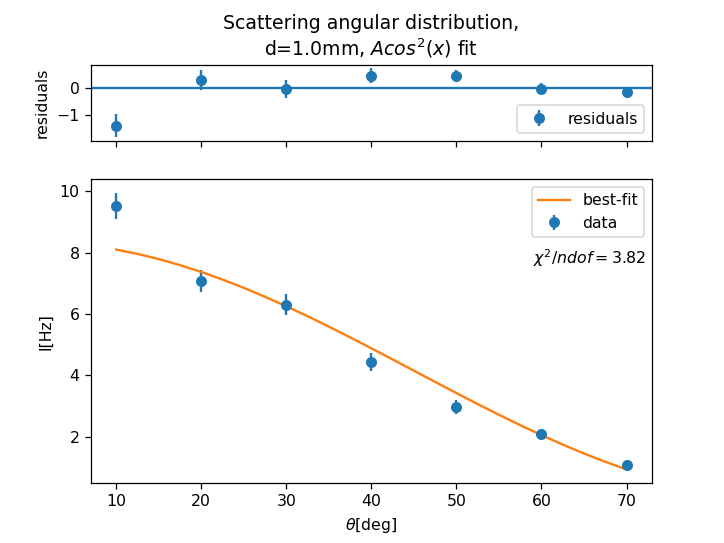

[[Model]]
    Model(dcosc)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 7
    # data points      = 7
    # variables        = 2
    chi-square         = 19.1095699
    reduced chi-square = 3.82191399
    Akaike info crit   = 11.0299537
    Bayesian info crit = 10.9217740
[[Variables]]
    A:  8.38789820 +/- 0.62957816 (7.51%) (init = 1)
    c: -0.03841975 +/- 0.27554047 (717.18%) (init = 0.6)
[[Correlations]] (unreported correlations are < 0.100)
    C(A, c) = -0.793


In [12]:
def dcosc(x,A,c):
    ret = A*np.cos(np.pi/180*x)**2+c
    return ret
ccm = Model(dcosc)
for i in range(1,4):
    fig = plt.figure()
    x = nv(data[i].theta)[1:]
    y = nv(data[i].I)[1:]
    yerr = sd(data[i].I)[1:]
    res = ccm.fit(nv(y),x=x,A=1,c=0.6,weights=1/yerr)
    
    res.plot(fig=fig,numpoints=25,xlabel=r'$\theta [\deg]$',ylabel="I[Hz]")
    fig.get_axes()[1].text(59,y[0]*0.8,f"$\chi^2/ndof=${res.redchi:.2f}")
    fig.get_axes()[0].set_title(f"Scattering angular distribution,\nd={ds[i]:.1f}mm, $Acos^2(x)$ fit")
    fig.savefig(f"angle_cos2_{int(ds[i]*10):d}dmm.png")
    print(str.format(res.fit_report()))